In [1]:
#imports
import numpy as np
import math 
import matplotlib.pyplot as plt
import random

In [2]:
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

In [3]:
A=(4, 5)  
B=(-2, -4) 
C=(8, -1)

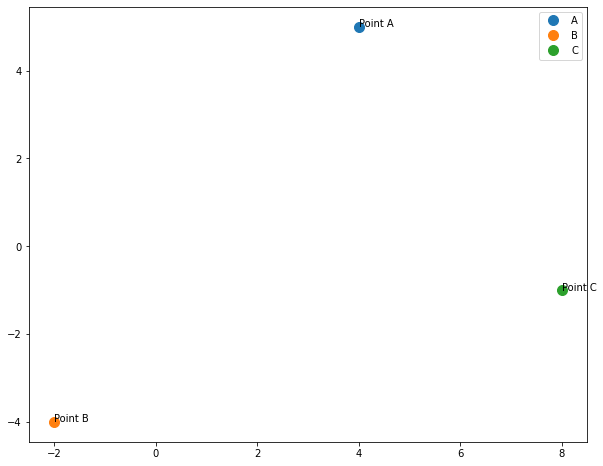

In [4]:
fig, ax = plt.subplots(figsize = (10,8))

#plot points
plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

plt.annotate("Point A", A)
plt.annotate("Point B", B)
plt.annotate("Point C", C)

plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [5]:
def calculate_d(x, y):
    return math.sqrt((x[0]- y[0])** 2 + (x[1]-y[1])**2)

In [6]:
calculate_d(A,B)

10.816653826391969

#### 1.3. What is the perimeter of triangle $ABC$?

In [7]:
def perimeter(a,b,c):
    return a + b + c

In [8]:
# note that the parameters of this function would be obtained from the previous function
a= calculate_d(A,B)
b= calculate_d(A,C)
c= calculate_d(C,B)

In [9]:
perimeter(a,b,c)

28.4680628862305

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [10]:
def initialize_grid():
    fig, ax = plt.subplots(figsize=(10, 10))
    # where do we want lines
    ticks = np.arange(-20, 20, 1)
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    # set axes' limits
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

In [11]:
x = np.linspace(
    start=-20, 
    stop=20, 
    num=600
)

In [12]:
y_1=2*x-3  
y_2=-3*x+12

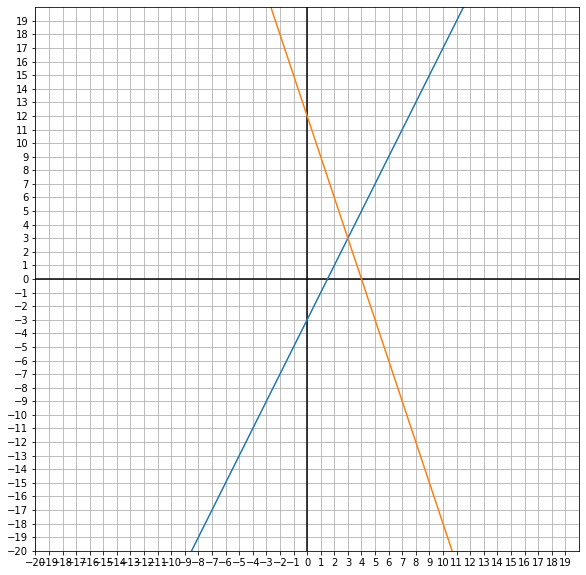

In [13]:
y = 2 * x - 3
y1 = (-3) * x + 12
initialize_grid()
plt.plot(x, y, "-", markersize=10)
plt.plot(x, y1, "-", markersize=2)


#### 2.2. What are the respective slopes

y_1= Slope 2


y_2= Slope -3

#### 2.3. Give 3 points through which $y_1$ goes through

In [14]:
xpts=[0, 7]
for x in xpts:
    y_1=2*x-3
    print(y_1)

-3
11


#### 2.4. Where do they intersect?

x=3

#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

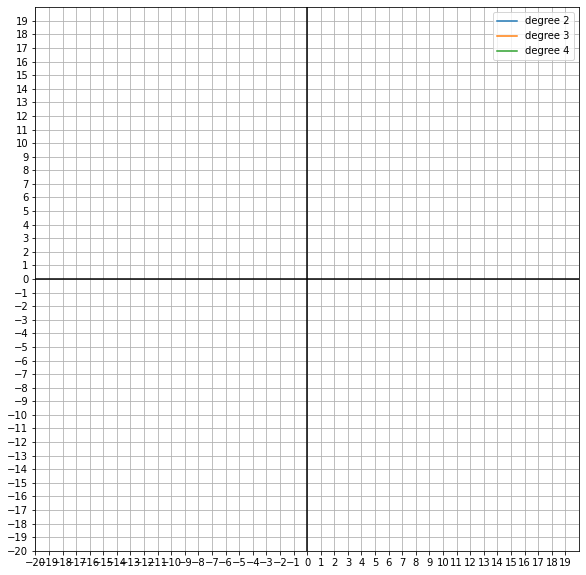

In [15]:
initialize_grid()
y2 = x**2 - 3 * x - 10 
y3 = x ** 3 - (2 * x) ** 2 + 5 * x + 1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1
plt.plot(x, y2, "-", label="degree 2")
plt.plot(x, y3, "-", label="degree 3")
plt.plot(x, y4, "-", label="degree 4")
plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [16]:
def calc_ys(x): 
    y_3= x**2 - 3*x - 10  
    y_4= x**3 - 2*x**2 + 5*x + 1   
    y_5= x**4 - x**3 + x*2 - x + 1
    print(y_3,y_4,y_5)
    

In [17]:
calc_ys(0)

-10 1 1


In [18]:
calc_ys(2)

-12 11 11


In [19]:
calc_ys(100)

9690 980501 99000101


#### 3.3. Who is the vertex of parabola $y_2$?

#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

#### 3.5. As x gets very big, what happens to $y$ go in each case?

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [20]:
e=np.exp(1)
round(e,3)

2.718

In [21]:
e

2.718281828459045

#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [22]:
powers=(0,1,2,3,10)
e**(powers)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       2.20264658e+04])

#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [23]:
n_powers=(0,-1,-2,-3,-10)

In [24]:
e**(n_powers)

array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       4.53999298e-05])

#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

In [25]:
e_ = e**(x)
e_1 = e**(2*x)
e_2 = 1/np.exp(1)

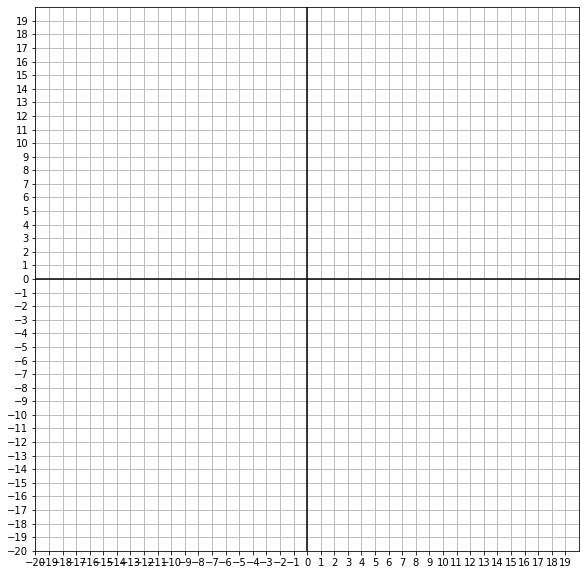

In [26]:
initialize_grid()
plt.plot(x, e_, "-", markersize=10)
plt.plot(x, e_1, "-", markersize=2)
plt.plot(x, e_2, "-", markersize=2)

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [27]:
4 + 5 + 6 + 7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [28]:
(-2 + 1) + (-1 + 1) + (0 + 1) + (1 + 1) + (2 + 1) + (3 + 1)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [29]:
((-2**2) - 2) + ((-1**2) - 2) + ((0**2) - 2) + ((1**2) - 2) + ((2**2) - 2) + ((3**2) - 2) + ((4**2) - 2)

11

$$\sum_{n=0}^4 (10^n - 1)$$

In [30]:
((10**0) -1) + ((10**1) -1) + ((10**1) -1) + ((10**2) -1) + ((10**3) -1) + ((10**4) -1)

11115

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

In [31]:
handshakes=int(10*(10-1)/2)

In [32]:
handshakes

45

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

In [34]:
def factorial(n):
    product = 1
    for i in range(1, n + 1):
        product = product * i
    return product

In [35]:
arrang=factorial(11)/(factorial(3)*factorial(8))

In [36]:
arrang

165.0

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000